In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train=pd.read_csv('../input/digit-recognizer/train.csv')
test=pd.read_csv('../input/digit-recognizer/test.csv')

In [3]:
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
len(train)

42000

In [5]:
train.info

<bound method DataFrame.info of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       

In [6]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X=train.drop(columns='label')
y=train['label']

<AxesSubplot:>

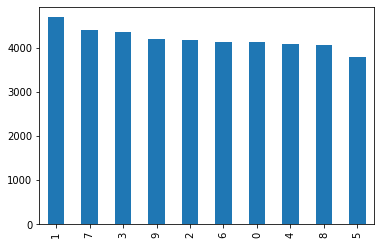

In [11]:
count=y.value_counts()
count.plot(kind='bar')

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
def get_model(model,df):
    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.2)
    mms = MinMaxScaler()
    X_train = mms.fit_transform(X_train)
    X_test = mms.transform(X_test)
    model.fit(X_train,y_train)
    predicted=model.predict(X_test)
    print('Accuracy : ',100*accuracy_score(y_test,predicted))
    print('F1 score:', f1_score(y_test, predicted,average='weighted'))
    print('Precision Score : ',100*precision_score(y_test,predicted,average='weighted'))
    print('Recall Score : ',100*recall_score(y_test,predicted,average='weighted'))
    print('Classification Report:')
    print(classification_report(y_test, predicted))
    plot_confusion_matrix(model,X_test, y_test)
    plt.show()
    

**KNN**

Accuracy :  96.0952380952381
F1 score: 0.9608592851736109
Precision Score :  96.1508413559192
Recall Score :  96.0952380952381
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       838
           1       0.94      1.00      0.97       940
           2       0.98      0.94      0.96       857
           3       0.96      0.96      0.96       868
           4       0.98      0.95      0.96       796
           5       0.97      0.95      0.96       776
           6       0.96      0.99      0.98       806
           7       0.95      0.97      0.96       894
           8       0.99      0.91      0.95       798
           9       0.93      0.94      0.94       827

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



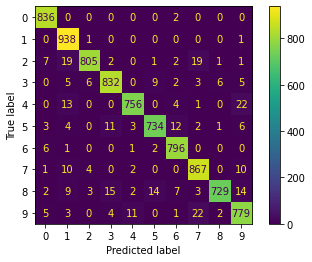

In [13]:
from sklearn.neighbors import KNeighborsClassifier as knc
model = knc(n_neighbors=10)
get_model(model,train)

**Random Forest**

Accuracy :  96.48809523809524
F1 score: 0.9648560850820065
Precision Score :  96.48664905713095
Recall Score :  96.48809523809524
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       823
           1       0.99      0.99      0.99       979
           2       0.96      0.95      0.96       836
           3       0.95      0.94      0.95       870
           4       0.96      0.97      0.96       790
           5       0.96      0.95      0.95       740
           6       0.98      0.97      0.98       823
           7       0.96      0.97      0.97       890
           8       0.96      0.96      0.96       786
           9       0.95      0.95      0.95       863

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



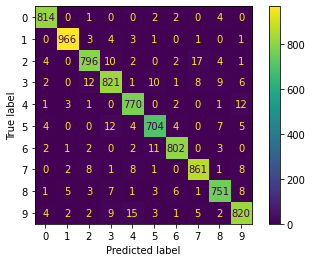

In [14]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
get_model(model,train)

**Decision Tree Classifier**

Accuracy :  86.14285714285714
F1 score: 0.8611610575683258
Precision Score :  86.14013790663442
Recall Score :  86.14285714285714
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       861
           1       0.92      0.96      0.94       912
           2       0.87      0.83      0.85       912
           3       0.82      0.82      0.82       877
           4       0.86      0.86      0.86       782
           5       0.78      0.78      0.78       739
           6       0.88      0.87      0.88       854
           7       0.87      0.93      0.90       837
           8       0.84      0.81      0.83       820
           9       0.81      0.82      0.81       806

    accuracy                           0.86      8400
   macro avg       0.86      0.86      0.86      8400
weighted avg       0.86      0.86      0.86      8400



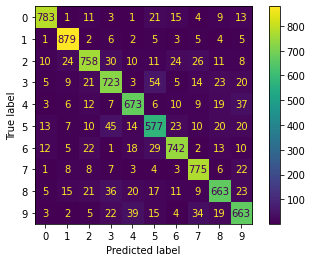

In [15]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')
get_model(model,train)

**Cart decision Tree**

Accuracy :  85.79761904761905
F1 score: 0.8577431710568874
Precision Score :  85.78341990982604
Recall Score :  85.79761904761905
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       806
           1       0.93      0.94      0.94       920
           2       0.84      0.84      0.84       823
           3       0.82      0.82      0.82       894
           4       0.83      0.86      0.84       751
           5       0.81      0.80      0.81       759
           6       0.87      0.91      0.89       858
           7       0.88      0.89      0.89       911
           8       0.82      0.78      0.80       855
           9       0.83      0.82      0.83       823

    accuracy                           0.86      8400
   macro avg       0.86      0.86      0.86      8400
weighted avg       0.86      0.86      0.86      8400



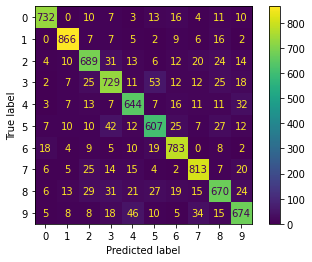

In [16]:
model=DecisionTreeClassifier(criterion='gini')
get_model(model,train)

**Naive Bayes**

Accuracy :  54.64285714285714
F1 score: 0.5001983836615631
Precision Score :  66.72137396299065
Recall Score :  54.64285714285714
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.91      0.79       835
           1       0.78      0.95      0.86       958
           2       0.87      0.24      0.38       855
           3       0.70      0.38      0.49       825
           4       0.78      0.13      0.23       838
           5       0.57      0.04      0.08       759
           6       0.63      0.95      0.76       819
           7       0.92      0.29      0.44       895
           8       0.30      0.57      0.39       811
           9       0.35      0.94      0.51       805

    accuracy                           0.55      8400
   macro avg       0.66      0.54      0.49      8400
weighted avg       0.67      0.55      0.50      8400



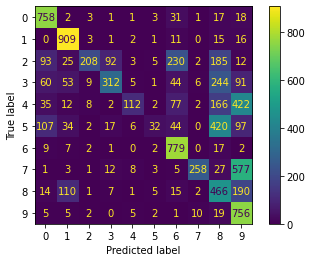

In [17]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
get_model(model,train)

Accuracy :  96.5952380952381
F1 score: 0.9659616075398861
Precision Score :  96.60684795557943
Recall Score :  96.5952380952381
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       833
           1       0.99      0.98      0.99       958
           2       0.95      0.97      0.96       844
           3       0.96      0.95      0.95       855
           4       0.97      0.96      0.97       820
           5       0.97      0.95      0.96       751
           6       0.97      0.99      0.98       873
           7       0.97      0.95      0.96       834
           8       0.95      0.96      0.96       796
           9       0.94      0.95      0.94       836

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



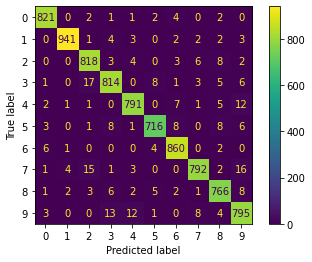

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
get_model(model,train)

**LGBM Classifier**

Accuracy :  97.63095238095238
F1 score: 0.9763100083757558
Precision Score :  97.63217175099945
Recall Score :  97.63095238095238
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       830
           1       0.98      0.98      0.98       911
           2       0.97      0.98      0.98       829
           3       0.98      0.97      0.97       920
           4       0.97      0.97      0.97       856
           5       0.98      0.97      0.98       743
           6       0.98      0.99      0.98       796
           7       0.97      0.98      0.98       848
           8       0.97      0.97      0.97       792
           9       0.96      0.97      0.97       875

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



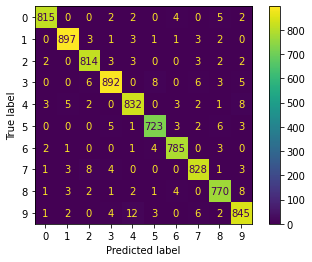

In [19]:
import lightgbm as ltb
ltb = ltb.LGBMClassifier(learning_rate=0.2,max_depth=-5,random_state=1)
get_model(ltb,train)

**Support Vector Machine**

Accuracy :  97.1547619047619
F1 score: 0.9715006973344885
Precision Score :  97.15921401229232
Recall Score :  97.1547619047619
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       774
           1       0.97      0.99      0.98       910
           2       0.98      0.97      0.97       857
           3       0.98      0.96      0.97       888
           4       0.98      0.98      0.98       842
           5       0.96      0.98      0.97       753
           6       0.98      0.99      0.98       807
           7       0.97      0.98      0.98       859
           8       0.97      0.96      0.96       836
           9       0.97      0.94      0.96       874

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



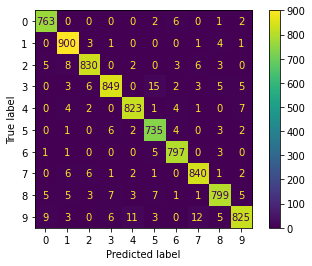

In [20]:
from sklearn.svm import SVC 
svc = SVC(kernel='poly', random_state = 1)
get_model(svc,train)

Accuracy :  93.0
F1 score: 0.9297588814563104
Precision Score :  92.99108686200086
Recall Score :  93.0
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       803
           1       0.96      0.99      0.97       944
           2       0.90      0.93      0.92       822
           3       0.89      0.89      0.89       884
           4       0.92      0.96      0.94       800
           5       0.91      0.88      0.89       752
           6       0.96      0.96      0.96       826
           7       0.94      0.94      0.94       867
           8       0.93      0.88      0.90       831
           9       0.93      0.90      0.91       871

    accuracy                           0.93      8400
   macro avg       0.93      0.93      0.93      8400
weighted avg       0.93      0.93      0.93      8400



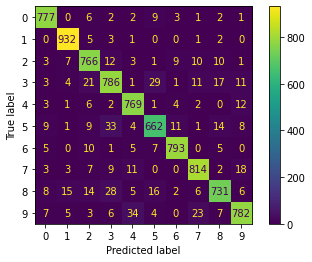

In [21]:
svc = SVC(kernel='linear', random_state = 1)
get_model(svc,train)

In [22]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
results=model.predict(test)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [24]:
submission.to_csv("submission.csv",index=False)